# Taylor Swift Channel EDA

## Step 0: Import libraries

In [26]:
%matplotlib inline

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Step 1: Prepare Data

In [2]:
FILE_NAME = 'data.csv'
df = pd.read_csv(FILE_NAME)

### Convert data types

In [3]:
df['published_date'] = pd.to_datetime(df['published_date'])
df['views'] = pd.to_numeric(df['views'], errors='coerce')
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')

### Replace null values by empty strings

In [4]:
df['description'] = df['description'].fillna('')

### Replace nan values by median values

In [5]:
likes_median = df['likes'].median()
df['likes'] = df['likes'].fillna(likes_median)

### Understanding this dataset

In [6]:
df.shape # To show (rows, columns)

(578, 8)

#### Show first 5 rows

In [7]:
df.head()

,id,published_date,title,description,likes,views,comments,is_short
0,PQTA-EVc5DI,2024-07-09,Taylor Swift - Fortnight (feat. Post Malone) (...,"""Fortnight (feat. Post Malone) (Cults Remix)"" ...",29468.0,761740,4802,False
1,HZIg5sQrPAM,2024-07-09,Taylor Swift - Fortnight (feat. Post Malone) (...,"""Fortnight (feat. Post Malone) (Acoustic)"" by ...",77849.0,1436971,5127,False
2,0GQ_QeZxdzo,2024-06-21,Taylor Swift - Fortnight (feat. Post Malone) (...,"Go behind the scenes of the ""Fortnight (feat. ...",158859.0,2562912,7569,False
3,KJXP13hqf2I,2024-05-22,Taylor Swift - Fortnight (feat Post Malone) (B...,"Listen to ""Fortnight (feat Post Malone) (BLOND...",70921.0,1935889,7192,False
4,ZwlBxvnH-So,2024-05-03,A fortnight since TTPD 🤍 brought to you by You...,,1364453.0,30713860,16262,True


#### Show attributes

In [8]:
df.columns

Index(['id', 'published_date', 'title', 'description', 'likes', 'views',
       'comments', 'is_short'],
      dtype='object')

In [9]:
df.describe()

,published_date,likes,views,comments
count,578,5.780000e+02,5.780000e+02,578.000000
mean,2018-04-08 23:35:05.190311424,5.010968e+05,5.232662e+07,20136.425606
min,2008-06-26 00:00:00,6.200000e+01,0.000000e+00,0.000000
25%,2013-02-05 00:00:00,2.950750e+04,1.192253e+06,1475.500000
50%,2020-02-03 12:00:00,1.314630e+05,5.147005e+06,3806.500000
75%,2022-10-22 00:00:00,2.878105e+05,1.701563e+07,8930.500000
max,2024-07-09 00:00:00,1.575415e+07,3.471313e+09,756152.000000
std,NaN,1.448378e+06,2.505565e+08,67224.756448


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              578 non-null    object        
 1   published_date  578 non-null    datetime64[ns]
 2   title           578 non-null    object        
 3   description     578 non-null    object        
 4   likes           578 non-null    float64       
 5   views           578 non-null    int64         
 6   comments        578 non-null    int64         
 7   is_short        578 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 32.3+ KB


#### Check Null values

In [11]:
df.isnull().sum()

id                0
published_date    0
title             0
description       0
likes             0
views             0
comments          0
is_short          0
dtype: int64

#### Check for duplicates

In [12]:
df.nunique()

id                578
published_date    272
title             574
description       446
likes             576
views             577
comments          563
is_short            2
dtype: int64

In [13]:
# Check for rows with full duplicate
df.duplicated().sum()

0

## Step 2: Distinguish Attributes

In [14]:
identifier = ['id']
temporal = ['published_date']
numerical = ['views', 'likes', 'comments']
categorical = ['is_short']
textual = ['title', 'description']

## Step 3: Univariate Analysis

#### Import the ProfileReport class from the ydata_profiling library

In [15]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)

In [16]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

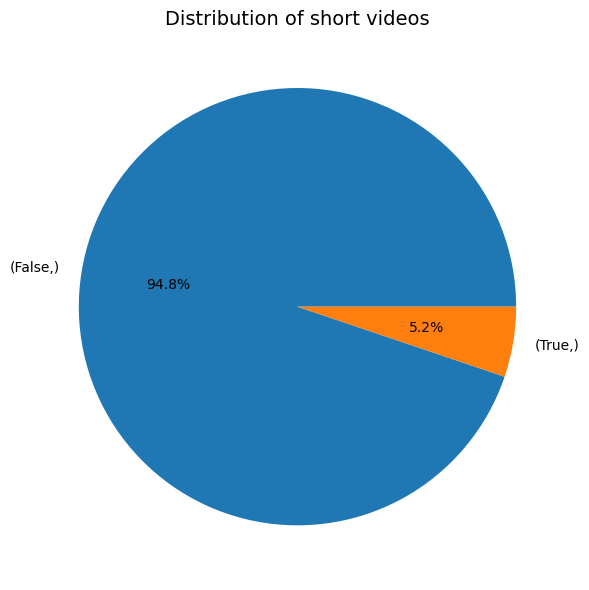

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))

df[categorical].value_counts(dropna=False).plot(
    kind='pie', 
    autopct='%1.1f%%',
    ax=ax
)

ax.set_title('Distribution of short videos', fontsize=14)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [30]:
df = df.sort_values('published_date') # sort values by date

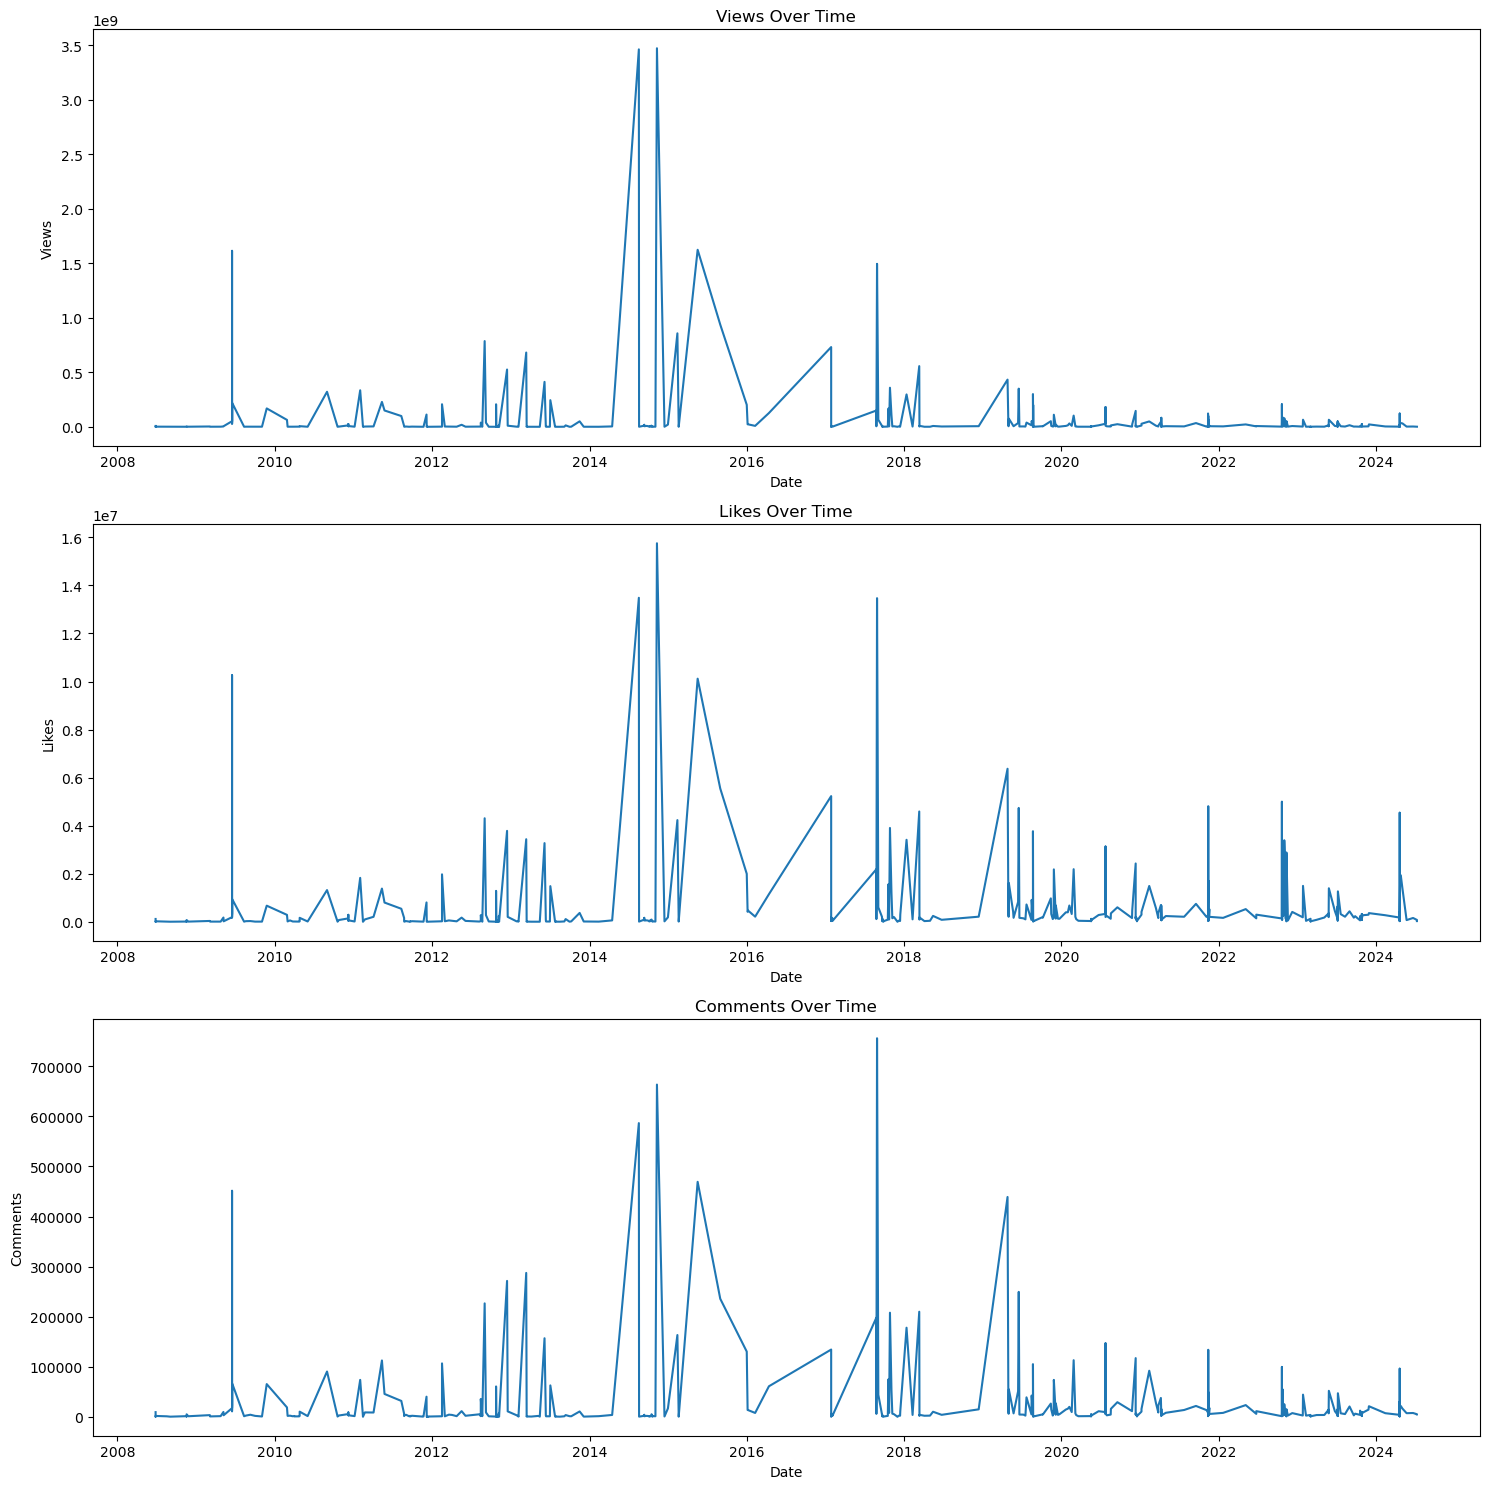

Total videos: 578
Total views: 30,244,783,942
Total likes: 289,633,946.0
Total comments: 11,638,854
Average views per video: 52,326,616
Average likes per video: 501,097
Average comments per video: 20,136
Most viewed video: Taylor Swift - Blank Space with 3,471,313,327 views
Most liked video: Taylor Swift - Blank Space with 15,754,150.0 likes
Most commented video: Taylor Swift - Look What You Made Me Do with 756,152 comments


In [31]:
plt.figure(figsize=(15, 15))

# Plot views over time
plt.subplot(3, 1, 1)
plt.plot(df['published_date'], df['views'])
plt.title('Views Over Time')
plt.xlabel('Date')
plt.ylabel('Views')

# Plot likes over time
plt.subplot(3, 1, 2)
plt.plot(df['published_date'], df['likes'])
plt.title('Likes Over Time')
plt.xlabel('Date')
plt.ylabel('Likes')

# Plot comments over time
plt.subplot(3, 1, 3)
plt.plot(df['published_date'], df['comments'])
plt.title('Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Comments')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Calculate and print some statistics
print(f"Total videos: {len(df)}")
print(f"Total views: {df['views'].sum():,}")
print(f"Total likes: {df['likes'].sum():,}")
print(f"Total comments: {df['comments'].sum():,}")
print(f"Average views per video: {df['views'].mean():,.0f}")
print(f"Average likes per video: {df['likes'].mean():,.0f}")
print(f"Average comments per video: {df['comments'].mean():,.0f}")
print(f"Most viewed video: {df.loc[df['views'].idxmax(), 'title']} with {df['views'].max():,} views")
print(f"Most liked video: {df.loc[df['likes'].idxmax(), 'title']} with {df['likes'].max():,} likes")
print(f"Most commented video: {df.loc[df['comments'].idxmax(), 'title']} with {df['comments'].max():,} comments")

In [32]:
def print_top_10(df, column, title):
    print(f"\nTop 10 videos by {title}:")
    top_10 = df.nlargest(10, column)
    for i, (_, row) in enumerate(top_10.iterrows(), 1):
        print(f"{i}. {row['title']}: {row[column]:,} {title}")

In [33]:
def plot_top_10(ax, df, column, title):
    top_10 = df.nlargest(10, column)
    sns.barplot(x=column, y='title', data=top_10, ax=ax)
    ax.set_title(f'Top 10 {title}')
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Video Title')

In [34]:
# Separate shorts and regular videos
shorts = df[df['is_short'] == True]
regular_videos = df[df['is_short'] == False]

In [35]:
def plot_top_10_comparison(regular_df, shorts_df, column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    plot_top_10(ax1, regular_df, column, f'Regular Videos by {column.capitalize()}')
    plot_top_10(ax2, shorts_df, column, f'Shorts by {column.capitalize()}')
    plt.tight_layout()
    plt.show()

C:\Users\quock\AppData\Local\Temp\ipykernel_31752\1812334893.py:5: UserWarning: Glyph 129763 (\N{FACE WITH PEEKING EYE}) missing from current font.
  plt.tight_layout()
C:\Users\quock\AppData\Local\Temp\ipykernel_31752\1812334893.py:5: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  plt.tight_layout()
C:\Users\quock\AppData\Local\Temp\ipykernel_31752\1812334893.py:5: UserWarning: Glyph 128075 (\N{WAVING HAND SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\quock\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129763 (\N{FACE WITH PEEKING EYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\quock\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\quock\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtool

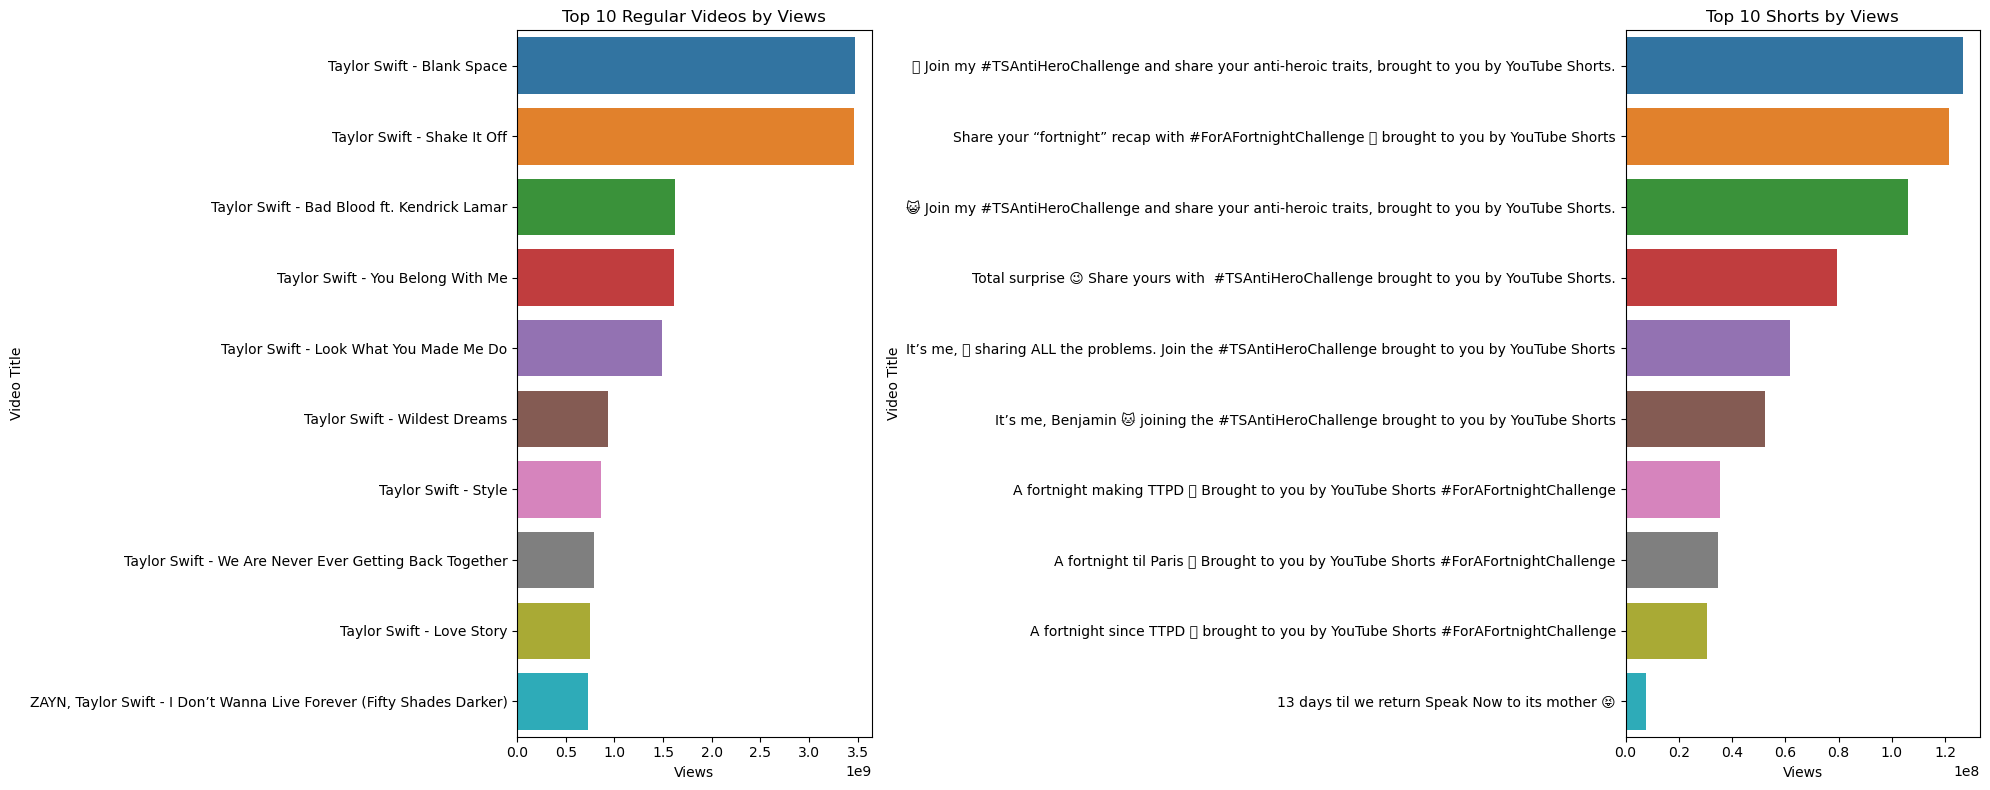

C:\Users\quock\AppData\Local\Temp\ipykernel_31752\1812334893.py:5: UserWarning: Glyph 129763 (\N{FACE WITH PEEKING EYE}) missing from current font.
  plt.tight_layout()
C:\Users\quock\AppData\Local\Temp\ipykernel_31752\1812334893.py:5: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  plt.tight_layout()
C:\Users\quock\AppData\Local\Temp\ipykernel_31752\1812334893.py:5: UserWarning: Glyph 128075 (\N{WAVING HAND SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\quock\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129763 (\N{FACE WITH PEEKING EYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\quock\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\quock\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtool

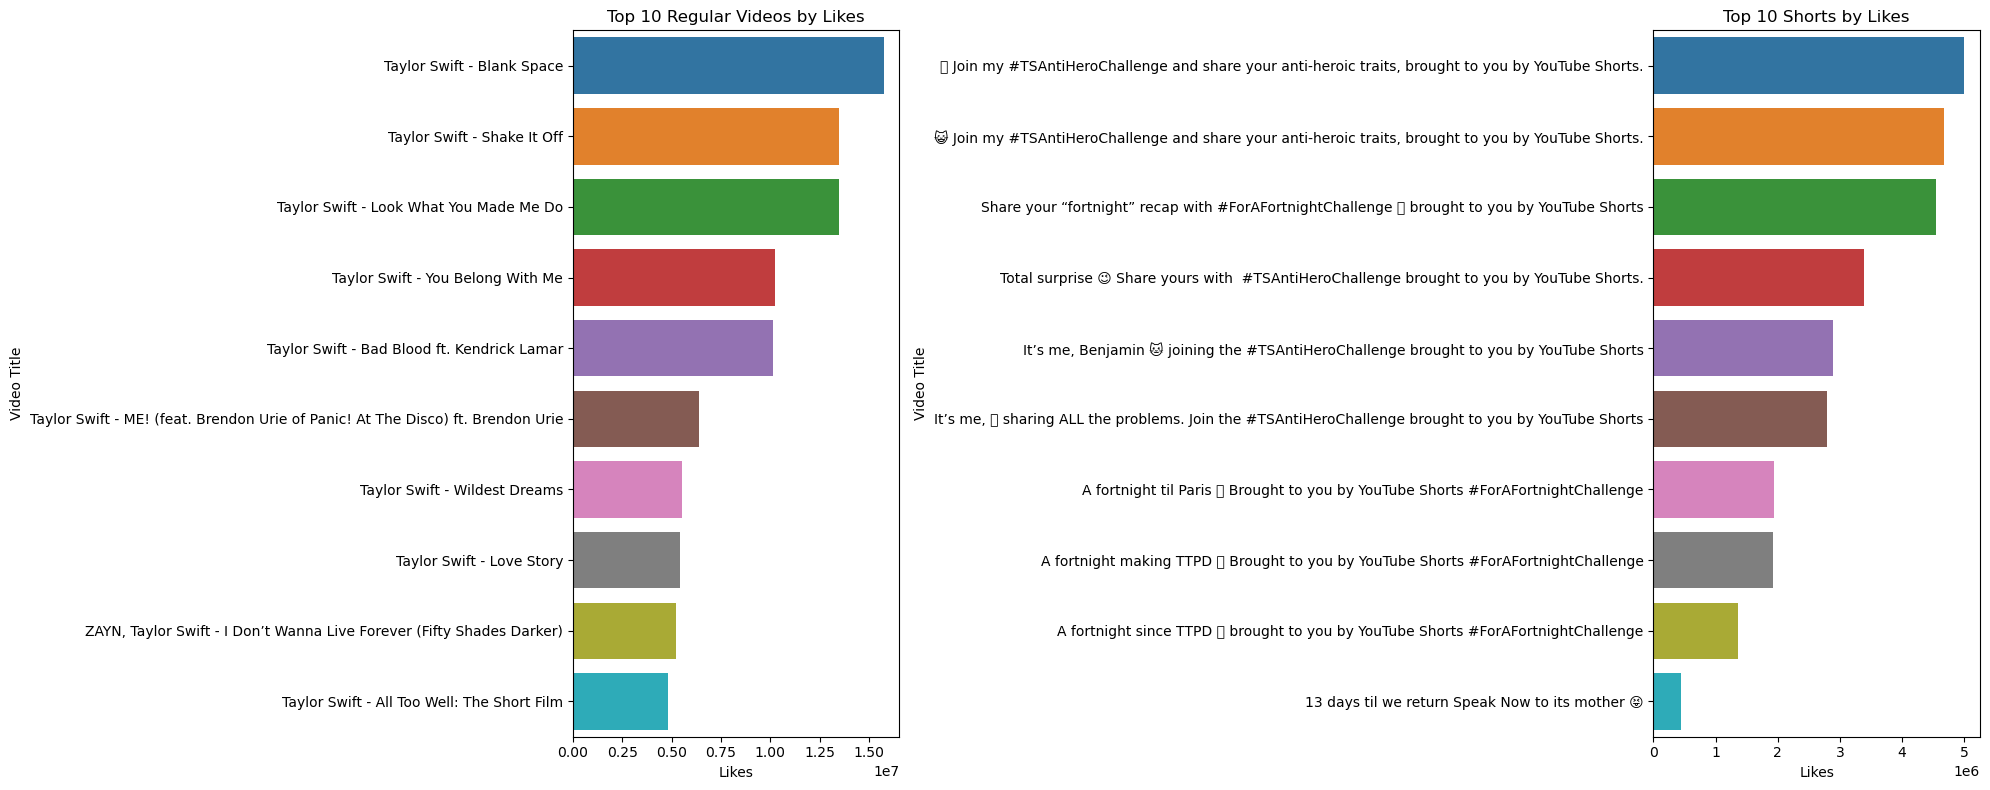

C:\Users\quock\AppData\Local\Temp\ipykernel_31752\1812334893.py:5: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  plt.tight_layout()
C:\Users\quock\AppData\Local\Temp\ipykernel_31752\1812334893.py:5: UserWarning: Glyph 129763 (\N{FACE WITH PEEKING EYE}) missing from current font.
  plt.tight_layout()
C:\Users\quock\AppData\Local\Temp\ipykernel_31752\1812334893.py:5: UserWarning: Glyph 128075 (\N{WAVING HAND SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\quock\AppData\Local\Temp\ipykernel_31752\1812334893.py:5: UserWarning: Glyph 129782 (\N{HEART HANDS}) missing from current font.
  plt.tight_layout()
C:\Users\quock\AppData\Local\Temp\ipykernel_31752\1812334893.py:5: UserWarning: Glyph 128139 (\N{KISS MARK}) missing from current font.
  plt.tight_layout()
C:\Users\quock\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  fig.canvas.print_figure(b

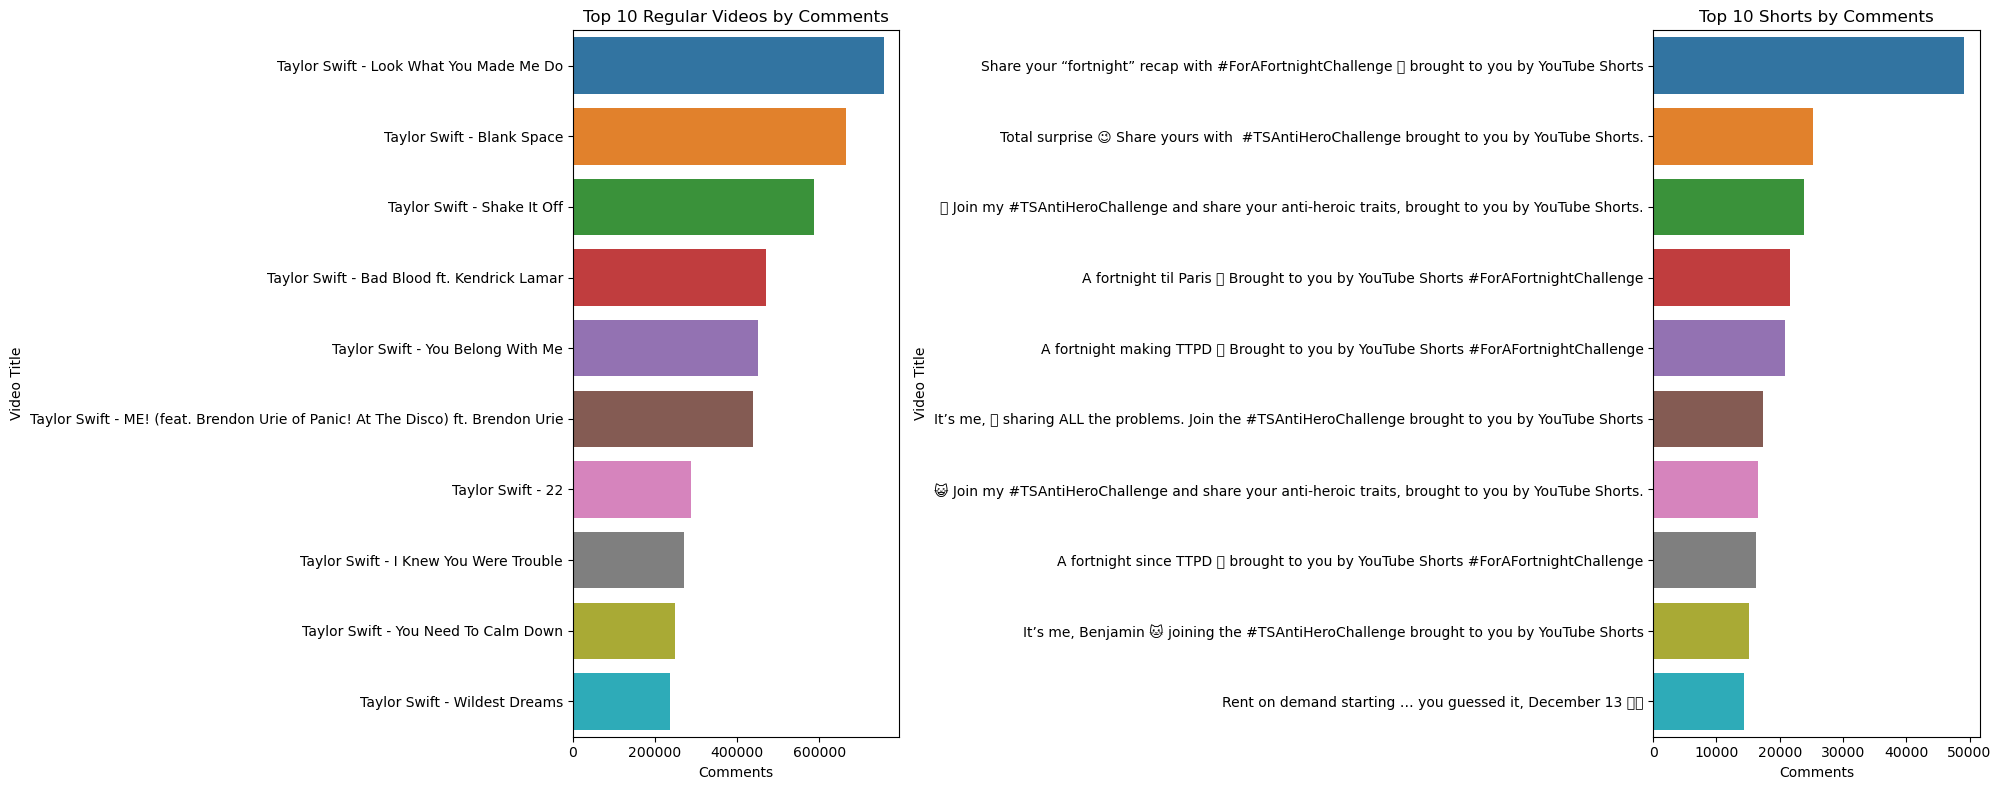

In [36]:
plot_top_10_comparison(regular_videos, shorts, 'views')
plot_top_10_comparison(regular_videos, shorts, 'likes')
plot_top_10_comparison(regular_videos, shorts, 'comments')

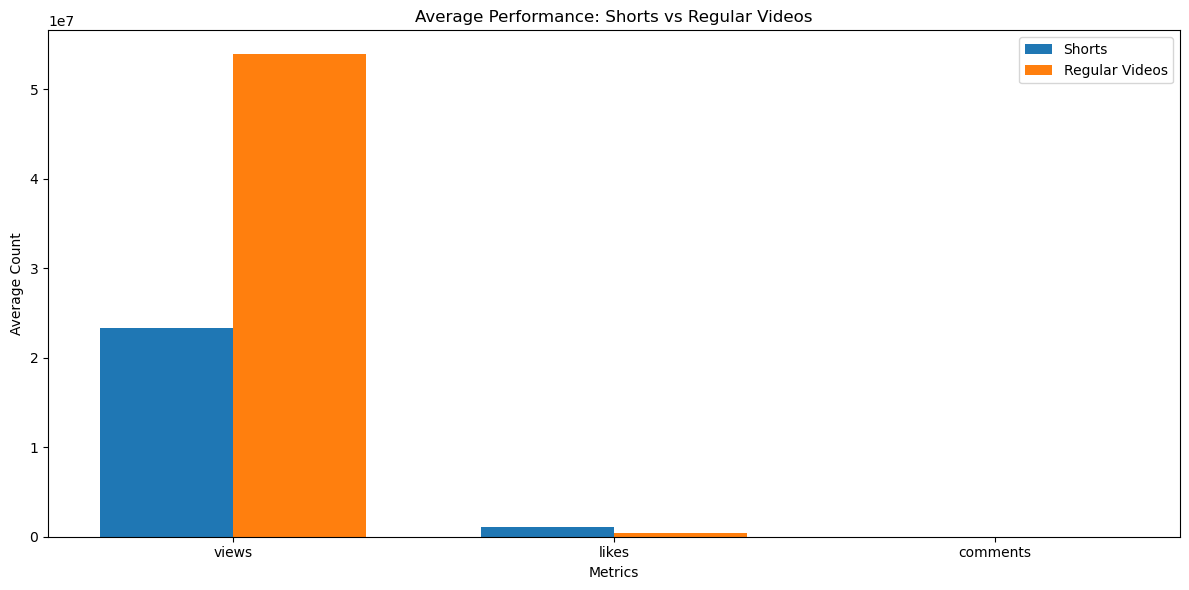


--- Average Performance Comparison ---
Average views for shorts: 23,328,051
Average views for regular videos: 53,914,128
Ratio (shorts / regular): 0.43

Average likes for shorts: 1,095,124
Average likes for regular videos: 468,577
Ratio (shorts / regular): 2.34

Average comments for shorts: 9,953
Average comments for regular videos: 20,694
Ratio (shorts / regular): 0.48



In [37]:
# Compare average performance of shorts vs regular videos
metrics = ['views', 'likes', 'comments']
avg_shorts = shorts[metrics].mean()
avg_regular = regular_videos[metrics].mean()

plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(metrics))

plt.bar(index, avg_shorts, bar_width, label='Shorts')
plt.bar([i + bar_width for i in index], avg_regular, bar_width, label='Regular Videos')

plt.xlabel('Metrics')
plt.ylabel('Average Count')
plt.title('Average Performance: Shorts vs Regular Videos')
plt.xticks([i + bar_width/2 for i in index], metrics)
plt.legend()

plt.tight_layout()
plt.show()

# Print average performance comparison
print("\n--- Average Performance Comparison ---")
for metric in metrics:
    print(f"Average {metric} for shorts: {avg_shorts[metric]:,.0f}")
    print(f"Average {metric} for regular videos: {avg_regular[metric]:,.0f}")
    print(f"Ratio (shorts / regular): {avg_shorts[metric] / avg_regular[metric]:.2f}")
    print()

In [38]:
# Create a date range from the earliest to the latest video
date_range = pd.date_range(start=df['published_date'].min(), end=df['published_date'].max(), freq='M')

# Count the number of videos per month for each type
shorts_count = shorts.groupby(shorts['published_date'].dt.to_period('M')).size().reindex(date_range.to_period('M'), fill_value=0)
regular_count = regular_videos.groupby(regular_videos['published_date'].dt.to_period('M')).size().reindex(date_range.to_period('M'), fill_value=0)

C:\Users\quock\AppData\Local\Temp\ipykernel_31752\3508630422.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=df['published_date'].min(), end=df['published_date'].max(), freq='M')


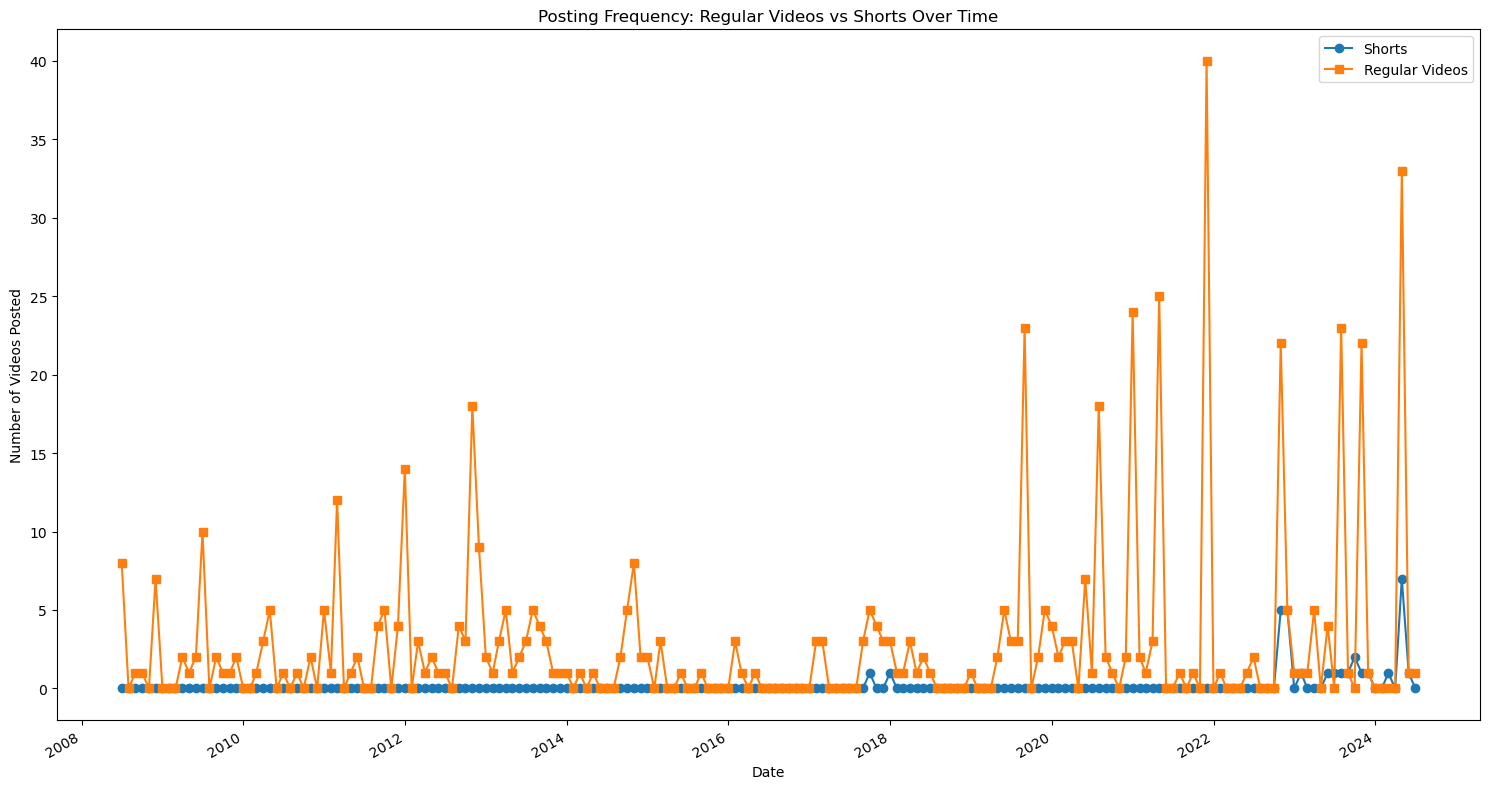

In [39]:
plt.figure(figsize=(15, 8))

# Plot the data
plt.plot(date_range, shorts_count.values, label='Shorts', marker='o')
plt.plot(date_range, regular_count.values, label='Regular Videos', marker='s')

# Customize the plot
plt.title('Posting Frequency: Regular Videos vs Shorts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Videos Posted')
plt.legend()

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Use a tight layout
plt.tight_layout()

# Show the plot
plt.show()

In [40]:
# Print some statistics about posting frequency
print("\n--- Posting Frequency Statistics ---")
print(f"Total number of videos: {len(df)}")
print(f"Number of regular videos: {len(regular_videos)}")
print(f"Number of shorts: {len(shorts)}")
print(f"Average number of regular videos per month: {regular_count.mean():.2f}")
print(f"Average number of shorts per month: {shorts_count.mean():.2f}")
print(f"Month with most regular videos: {regular_count.idxmax()} ({regular_count.max()} videos)")
print(f"Month with most shorts: {shorts_count.idxmax()} ({shorts_count.max()} shorts)")


--- Posting Frequency Statistics ---
Total number of videos: 578
Number of regular videos: 548
Number of shorts: 30
Average number of regular videos per month: 2.83
Average number of shorts per month: 0.16
Month with most regular videos: 2021-11 (40 videos)
Month with most shorts: 2024-04 (7 shorts)


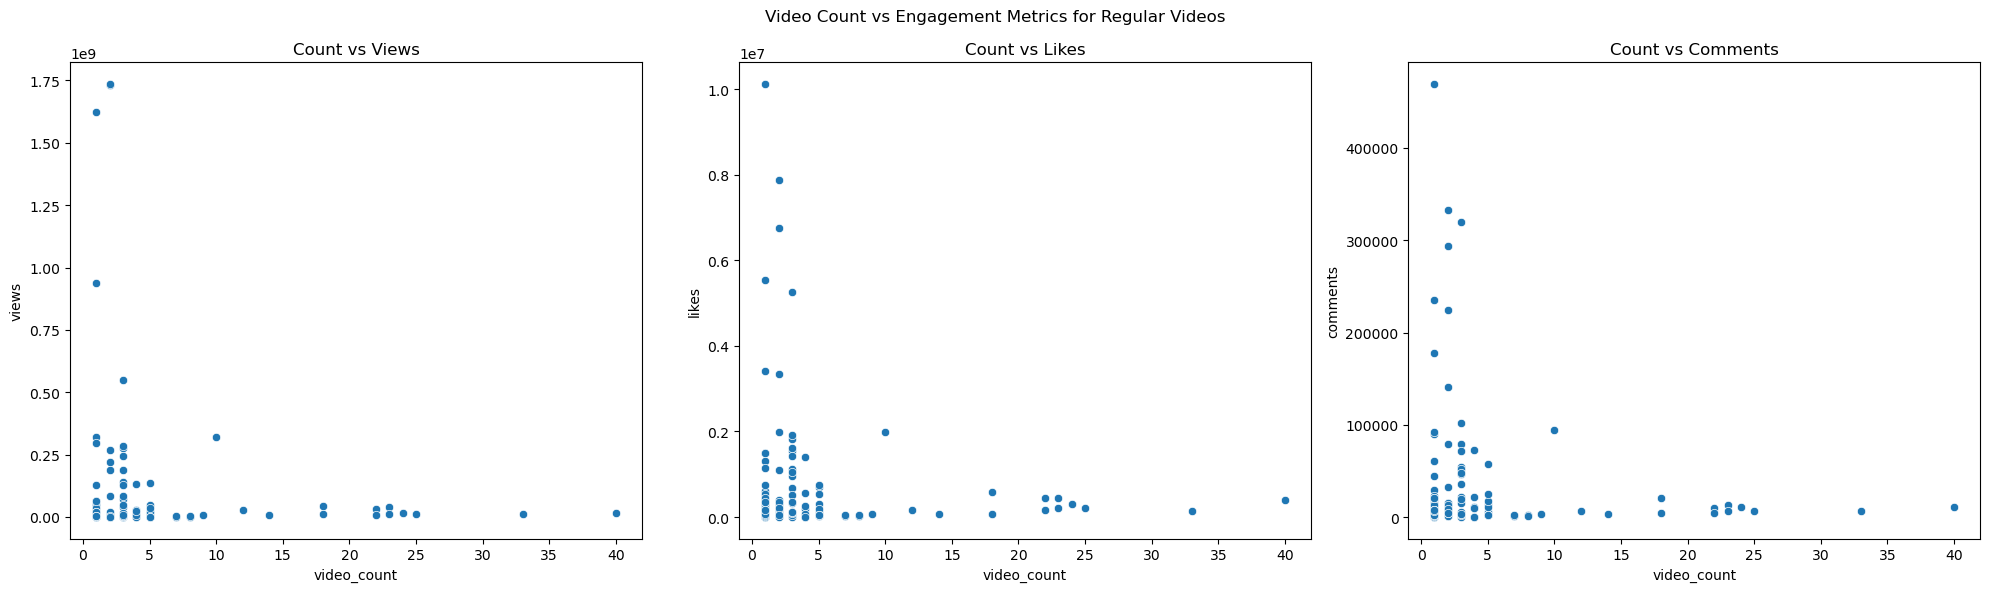

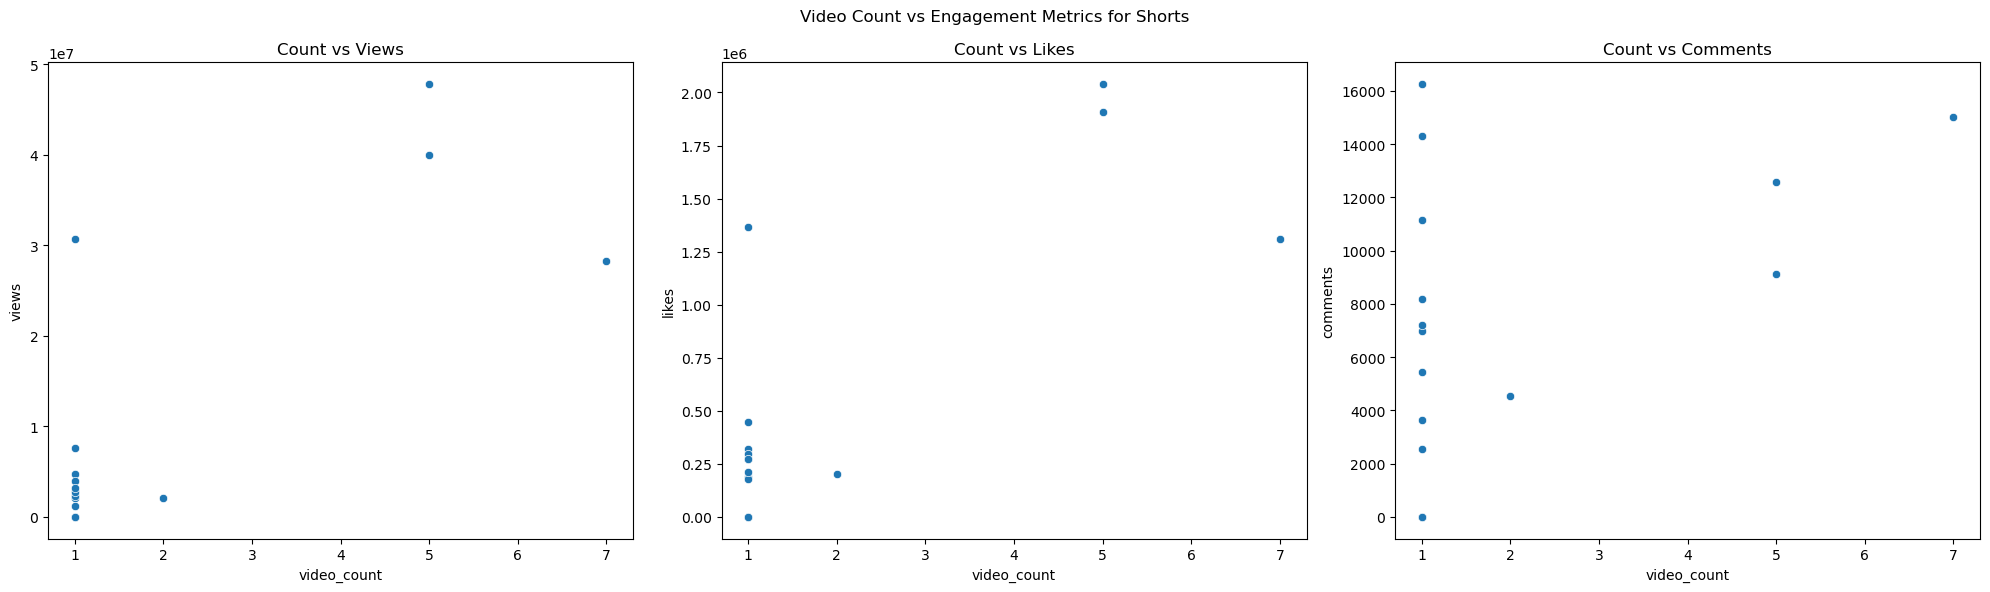

In [41]:
# Calculate monthly engagement metrics
def calculate_monthly_engagement(videos):
    monthly_data = videos.groupby(videos['published_date'].dt.to_period('M')).agg({
        'views': 'mean',
        'likes': 'mean',
        'comments': 'mean',
        'id': 'count'  # Count of videos
    }).rename(columns={'id': 'video_count'})
    return monthly_data

regular_monthly = calculate_monthly_engagement(regular_videos)
shorts_monthly = calculate_monthly_engagement(shorts)

# Scatter plots of video count vs engagement metrics
def plot_count_vs_engagement(df, video_type):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle(f'Video Count vs Engagement Metrics for {video_type}')
    
    sns.scatterplot(x='video_count', y='views', data=df, ax=axes[0])
    axes[0].set_title('Count vs Views')
    
    sns.scatterplot(x='video_count', y='likes', data=df, ax=axes[1])
    axes[1].set_title('Count vs Likes')
    
    sns.scatterplot(x='video_count', y='comments', data=df, ax=axes[2])
    axes[2].set_title('Count vs Comments')
    
    plt.tight_layout()
    plt.show()

plot_count_vs_engagement(regular_monthly, "Regular Videos")
plot_count_vs_engagement(shorts_monthly, "Shorts")

c:\Users\quock\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\quock\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\quock\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\quock\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

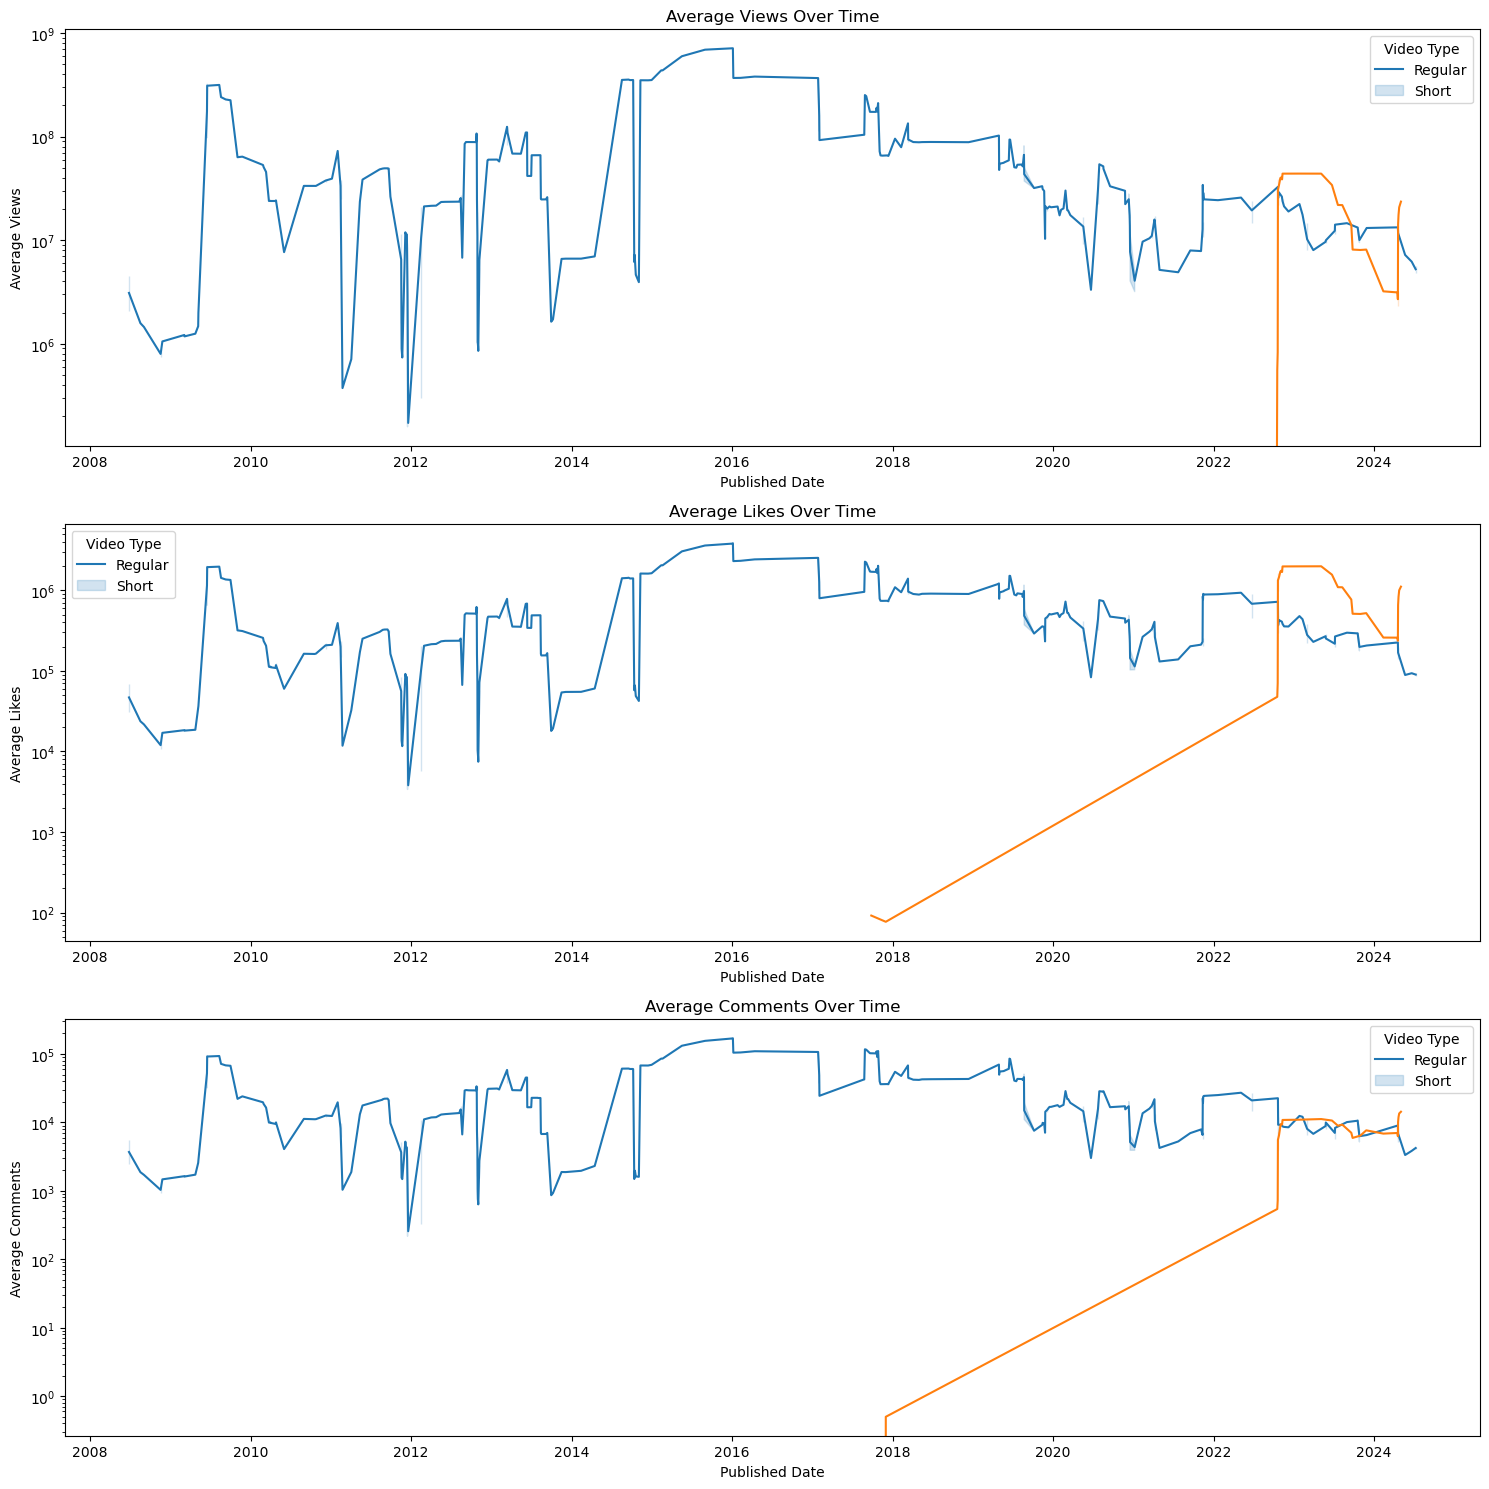

In [43]:
pd.option_context('mode.use_inf_as_na', True)
window_size = 10
for column in numerical:
    df[f'{column}_ma'] = df.groupby('is_short')[column].rolling(window=window_size, min_periods=1).mean().reset_index(0, drop=True)

# Tạo biểu đồ
plt.figure(figsize=(15, 15))

for i, metric in enumerate(numerical, 1):
    plt.subplot(3, 1, i)
    
    sns.lineplot(x='published_date', y=f'{metric}_ma', hue='is_short', data=df, 
                 markers=True, dashes=False)
    
    plt.title(f'Average {metric.capitalize()} Over Time')
    plt.xlabel('Published Date')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.yscale('log')  # Sử dụng thang logarit cho trục y
    plt.legend(title='Video Type', labels=['Regular', 'Short'])

plt.tight_layout()
plt.show()